In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
dim_date = pd.read_csv(r'Hospitality data\Dataset\dim_date.csv')
dim_hotels = pd.read_csv(r'Hospitality data\Dataset\dim_hotels.csv')
dim_rooms = pd.read_csv(r'Hospitality data\Dataset\dim_rooms.csv')
fact_bookings = pd.read_csv(r'Hospitality data\Dataset\fact_bookings.csv')
fact_aggregated_bookings = pd.read_csv(r'Hospitality data\Dataset\fact_aggregated_bookings.csv')

In [9]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [13]:
dim_date.sample(10)

,date,mmm yy,week no,day_type
5,06-May-22,May 22,W 19,weekeday
84,24-Jul-22,Jul 22,W 31,weekend
24,25-May-22,May 22,W 22,weekeday
21,22-May-22,May 22,W 22,weekend
9,10-May-22,May 22,W 20,weekeday
4,05-May-22,May 22,W 19,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
85,25-Jul-22,Jul 22,W 31,weekeday
32,02-Jun-22,Jun 22,W 23,weekeday
39,09-Jun-22,Jun 22,W 24,weekeday


In [8]:
dim_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [14]:
dim_hotels.sample(10)

,property_id,property_name,category,city
13,18559,Atliq Exotica,Luxury,Hyderabad
10,17562,Atliq Bay,Luxury,Mumbai
11,17563,Atliq Palace,Business,Mumbai
8,17560,Atliq City,Business,Mumbai
6,17558,Atliq Grands,Luxury,Mumbai
18,19558,Atliq Grands,Luxury,Bangalore
15,18561,Atliq Blu,Luxury,Hyderabad
9,17561,Atliq Blu,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [10]:
dim_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [16]:
dim_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [11]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [17]:
fact_bookings.sample(10)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
102186,Jul092216562RT110,16562,2022-07-02,2022-07-09,2022-07-15,4,RT1,others,4.0,Checked Out,10920,10920
2524,May022217561RT114,17561,2022-04-27,2022-05-02,2022-05-07,2,RT1,makeyourtrip,5.0,Checked Out,11050,11050
81716,Jun252219560RT314,19560,2022-06-25,2022-06-25,2022-06-26,2,RT3,others,NaN,Cancelled,18000,7200
127213,Jul262217563RT29,17563,2022-07-24,2022-07-26,2022-07-27,1,RT2,others,NaN,Cancelled,15300,6120
130266,Jul292216560RT43,16560,2022-07-26,2022-07-29,2022-07-30,4,RT4,journey,NaN,Checked Out,31920,31920
25101,May172217560RT116,17560,2022-05-17,2022-05-17,2022-05-18,1,RT1,direct offline,4.0,Checked Out,11050,11050
124031,Jul242216559RT324,16559,2022-07-19,2022-07-24,2022-07-25,2,RT3,others,NaN,Checked Out,20400,20400
4603,May032219561RT31,19561,2022-05-02,2022-05-03,2022-05-04,2,RT3,others,NaN,Checked Out,18000,18000
82206,Jun262216560RT38,16560,2022-06-22,2022-06-26,2022-06-28,1,RT3,makeyourtrip,1.0,Checked Out,16800,16800
121776,Jul222218560RT46,18560,2022-07-20,2022-07-22,2022-07-26,1,RT4,others,3.0,Checked Out,19000,19000


In [21]:
fact_bookings.isnull().mean()*100

booking_id            0.000000
property_id           0.000000
booking_date          0.000000
check_in_date         0.000000
checkout_date         0.000000
no_guests             0.000000
room_category         0.000000
booking_platform      0.000000
ratings_given        57.884687
booking_status        0.000000
revenue_generated     0.000000
revenue_realized      0.000000
dtype: float64

C:\Users\ASUS.DESKTOP-P2T6A7T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ratings_given', ylabel='Density'>

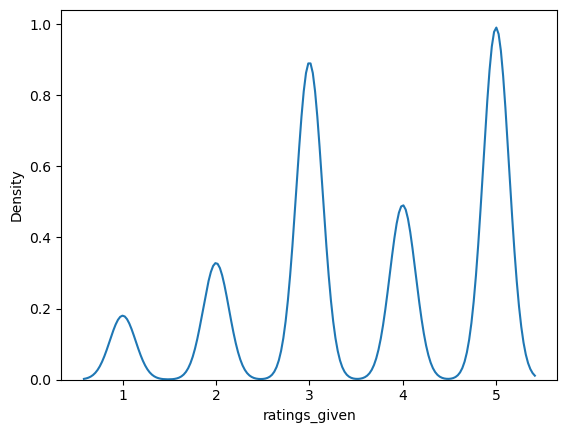

In [39]:
sns.kdeplot(data=fact_bookings,x='ratings_given')

In [28]:
fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


<Axes: xlabel='revenue_generated'>

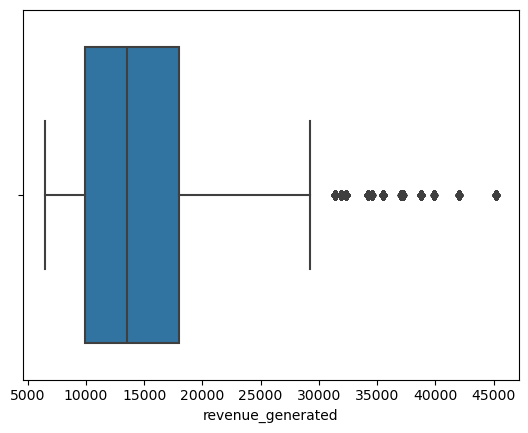

In [34]:
sns.boxplot(data=fact_bookings,x='revenue_generated')

<Axes: xlabel='revenue_realized'>

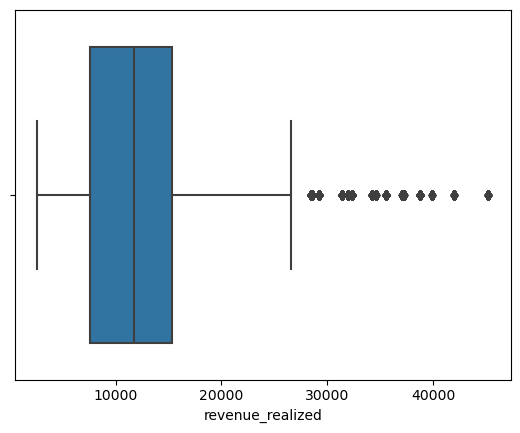

In [35]:
sns.boxplot(data=fact_bookings,x='revenue_realized')

In [12]:
fact_aggregated_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [18]:
fact_aggregated_bookings.sample(10)

,property_id,check_in_date,room_category,successful_bookings,capacity
5439,18562,24-Jun-22,RT2,18,34
8355,17562,23-Jul-22,RT3,12,27
1631,16558,17-May-22,RT2,12,22
7363,17560,13-Jul-22,RT3,13,25
4059,18561,10-Jun-22,RT3,15,25
4811,16561,18-Jun-22,RT1,17,18
7494,16562,14-Jul-22,RT4,3,6
2490,17559,25-May-22,RT4,9,14
6182,17564,01-Jul-22,RT4,7,17
4274,19558,12-Jun-22,RT3,12,21


In [29]:
fact_aggregated_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9200.000000
mean,18040.640000,14.629348,25.280000
std,1099.818325,7.591770,11.440971
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,43.000000,50.000000


<Axes: xlabel='successful_bookings'>

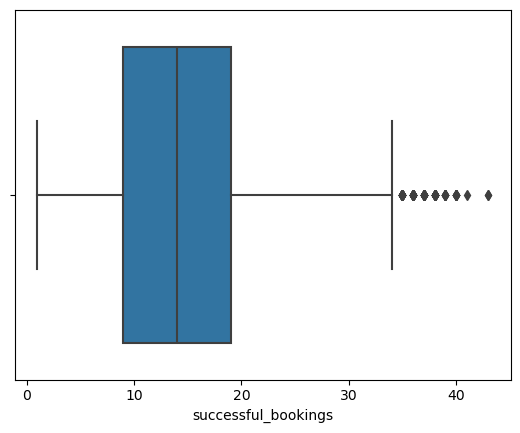

In [32]:
sns.boxplot(data=fact_aggregated_bookings,x='successful_bookings')

In [43]:
import numpy as np
fact_bookings['ratings_given'] = np.random.randint(1, 6, size=len(fact_bookings))

C:\Users\ASUS.DESKTOP-P2T6A7T\AppData\Local\Temp\ipykernel_2780\785278705.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<function <lambda> at 0x000001B04C585120>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  fact_bookings["ratings_given"].fillna(lambda x: random.choice(fact_bookings[fact_bookings["ratings_given"] != np.nan]["ratings_given"]),inplace=True)


In [44]:
fact_bookings.sample(10)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
66745,Jun142219563RT222,19563,2022-06-13,2022-06-14,2022-06-16,4,RT2,others,<function <lambda> at 0x000001B04C585120>,Cancelled,16200,6480
100959,Jul082217560RT115,17560,2022-07-08,2022-07-08,2022-07-11,1,RT1,others,3.0,Checked Out,11050,11050
103806,Jul092219563RT317,19563,2022-07-09,2022-07-09,2022-07-11,1,RT3,others,3.0,Checked Out,18000,18000
91179,Jul022216560RT311,16560,2022-06-29,2022-07-02,2022-07-04,2,RT3,direct online,<function <lambda> at 0x000001B04C585120>,Cancelled,16800,6720
34664,May242216563RT223,16563,2022-05-22,2022-05-24,2022-05-25,2,RT2,journey,<function <lambda> at 0x000001B04C585120>,Cancelled,12600,5040
134168,Jul312219558RT27,19558,2022-07-26,2022-07-31,2022-08-06,2,RT2,tripster,<function <lambda> at 0x000001B04C585120>,Cancelled,13500,5400
55874,Jun082216559RT211,16559,2022-06-07,2022-06-08,2022-06-11,2,RT2,logtrip,<function <lambda> at 0x000001B04C585120>,Checked Out,15300,15300
112992,Jul162216559RT236,16559,2022-07-10,2022-07-16,2022-07-17,2,RT2,others,<function <lambda> at 0x000001B04C585120>,Checked Out,15300,15300
62910,Jun122217563RT24,17563,2022-06-11,2022-06-12,2022-06-14,4,RT2,others,<function <lambda> at 0x000001B04C585120>,Checked Out,18360,18360
15393,May102219558RT15,19558,2022-05-06,2022-05-10,2022-05-12,1,RT1,others,<function <lambda> at 0x000001B04C585120>,Checked Out,9750,9750


In [47]:
fact_bookings['ratings_given'].mean()

3.619003934160154